## **Data Analysis using Pivot Charts**


## Introduction
 Pivot charts play a crucial role in data analytics by enabling quick and intuitive exploration of multidimensional datasets. They allow analysts to summarize and visualize complex data relationships across multiple variables, facilitating insights that might be obscured in raw data tables. By dynamically aggregating and pivoting data, these charts provide a comprehensive view of trends, patterns, and correlations, empowering decision-makers to identify key factors influencing outcomes. Pivot charts enhance data-driven decision-making processes by simplifying complex data into actionable visual representations, thereby accelerating understanding and fostering informed strategies in diverse fields such as business analytics, market research, and scientific studies.


## Objectives



 - Use Pivot charts for data analytics
 - Use different types of charts for different scenarios
 - Make deeper inferences from data based on the pivoted representations


----


In [1]:
# install Pandas
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing required libraries 
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import requests

Dataset needs to be dowloaded from the cloud server


In [6]:
url=  " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite" 

In [7]:
response= requests.get(url)

# Save the content to a file
with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

In [8]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""  # query to select master table
df = pd.read_sql(QUERY,conn)

### Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction


First,  we shall plot a distribution of the respondents in terms of their Career Satisfaction and Job satisfaction. For this, we need to create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents.

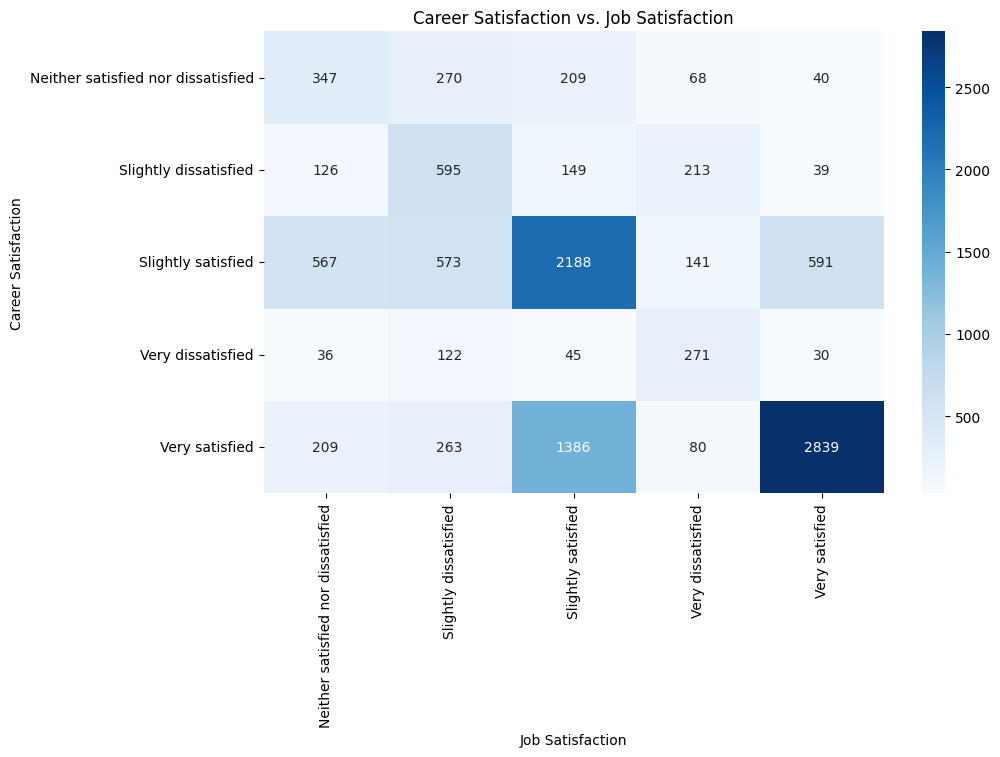

In [9]:
# create pivot table
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference:
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels across different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.


### Scenario 2: Comparison of Open Source Adoption Across Operating Systems
In this scenario, we can visualize the adoption of Open Sourse systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys`and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph shall be plotted as a grouped bar graph.


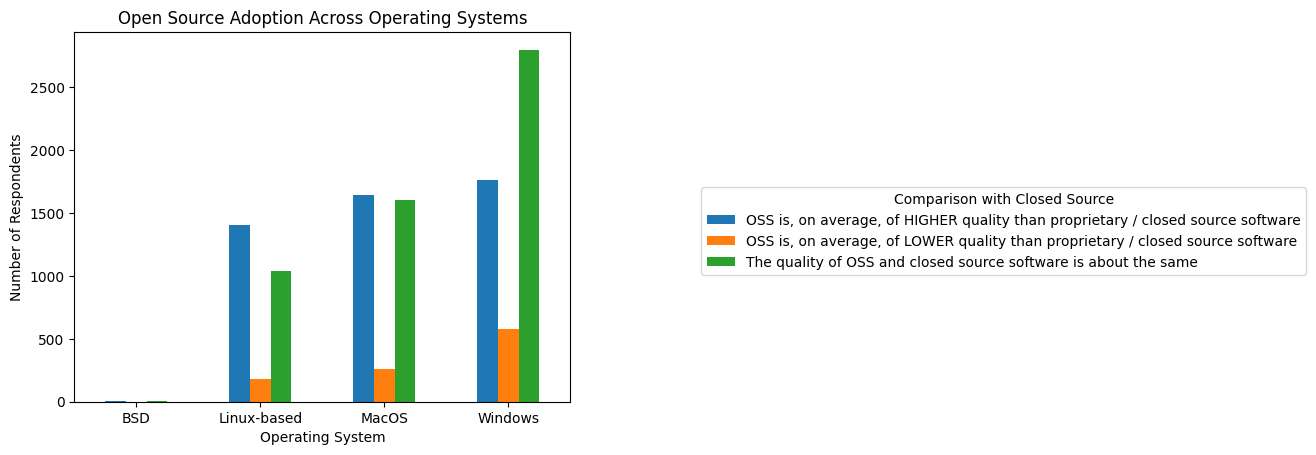

In [10]:
pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# grouped bar graph
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source',bbox_to_anchor=(1.25, 0.6), loc='upper left')
plt.xticks(rotation=0)
plt.show()

#### Inference:
* Linux-based Systems: Most believe OSS is of higher quality, with fewer seeing it as lower quality or the same.

* MacOS: Opinions are more balanced. Many think OSS is either of higher quality or the same, with fewer believing it's lower.

* Windows: Majority believe OSS and closed source software are about the same quality, followed by those who see OSS as higher quality, and a smaller number who think it's lower.

* This data suggests a strong preference for OSS within the Linux community and a more balanced view among MacOS and Windows users


### Scenario 3: Job Satisfaction and Career Aspirations by Employment Status

In this scenario, we shall explore a deeper interpretation of the data using Pivot charts. Let us explore how employment status and job satisfaction affects the career aspirations of the respondents. 

For this, we shall create a pivot table with 'Employment' and 'JobSat' fields as index, 'MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'.


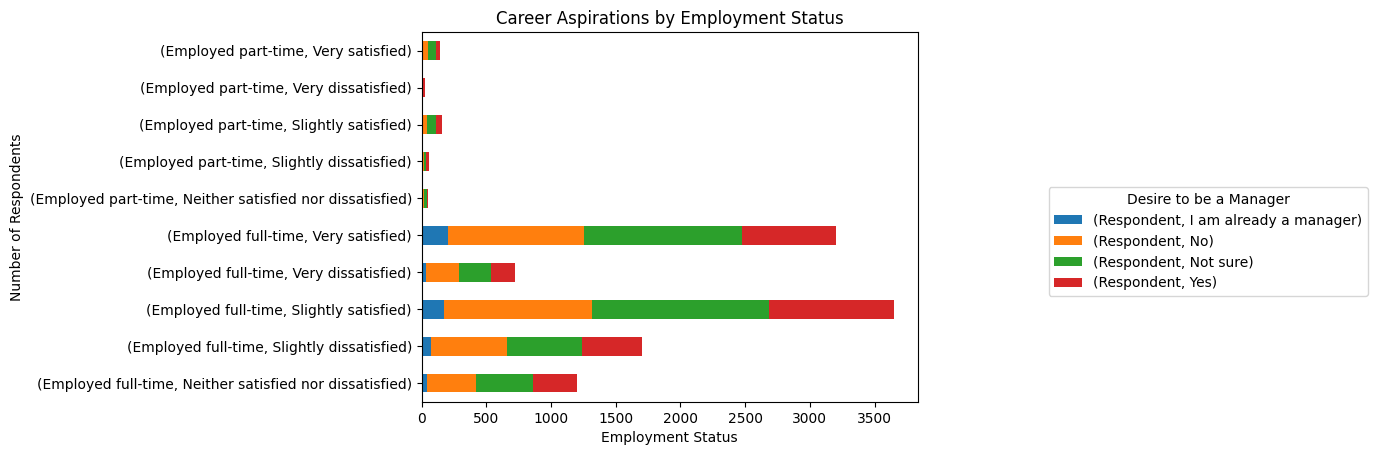

In [11]:
# create pivot table
pivot_table = pd.pivot_table(df, index=['Employment', 'JobSat'], columns='MgrWant',
                             values=['Respondent'],  aggfunc='count',
                             fill_value=0)

# pivot chart
pivot_table.plot(kind='barh', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager', bbox_to_anchor=(1.25, 0.6),
           loc='upper left')
plt.xticks(rotation=0)
plt.show()


#### Inference:

Full-time employees, especially satisfied ones, are more inclined towards managerial roles compared to part-time employees. Job satisfaction plays a crucial role in career aspirations, driving more satisfied employees towards managerial ambitions

<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|>
